# Comparative Analysis Of Recruitment Models

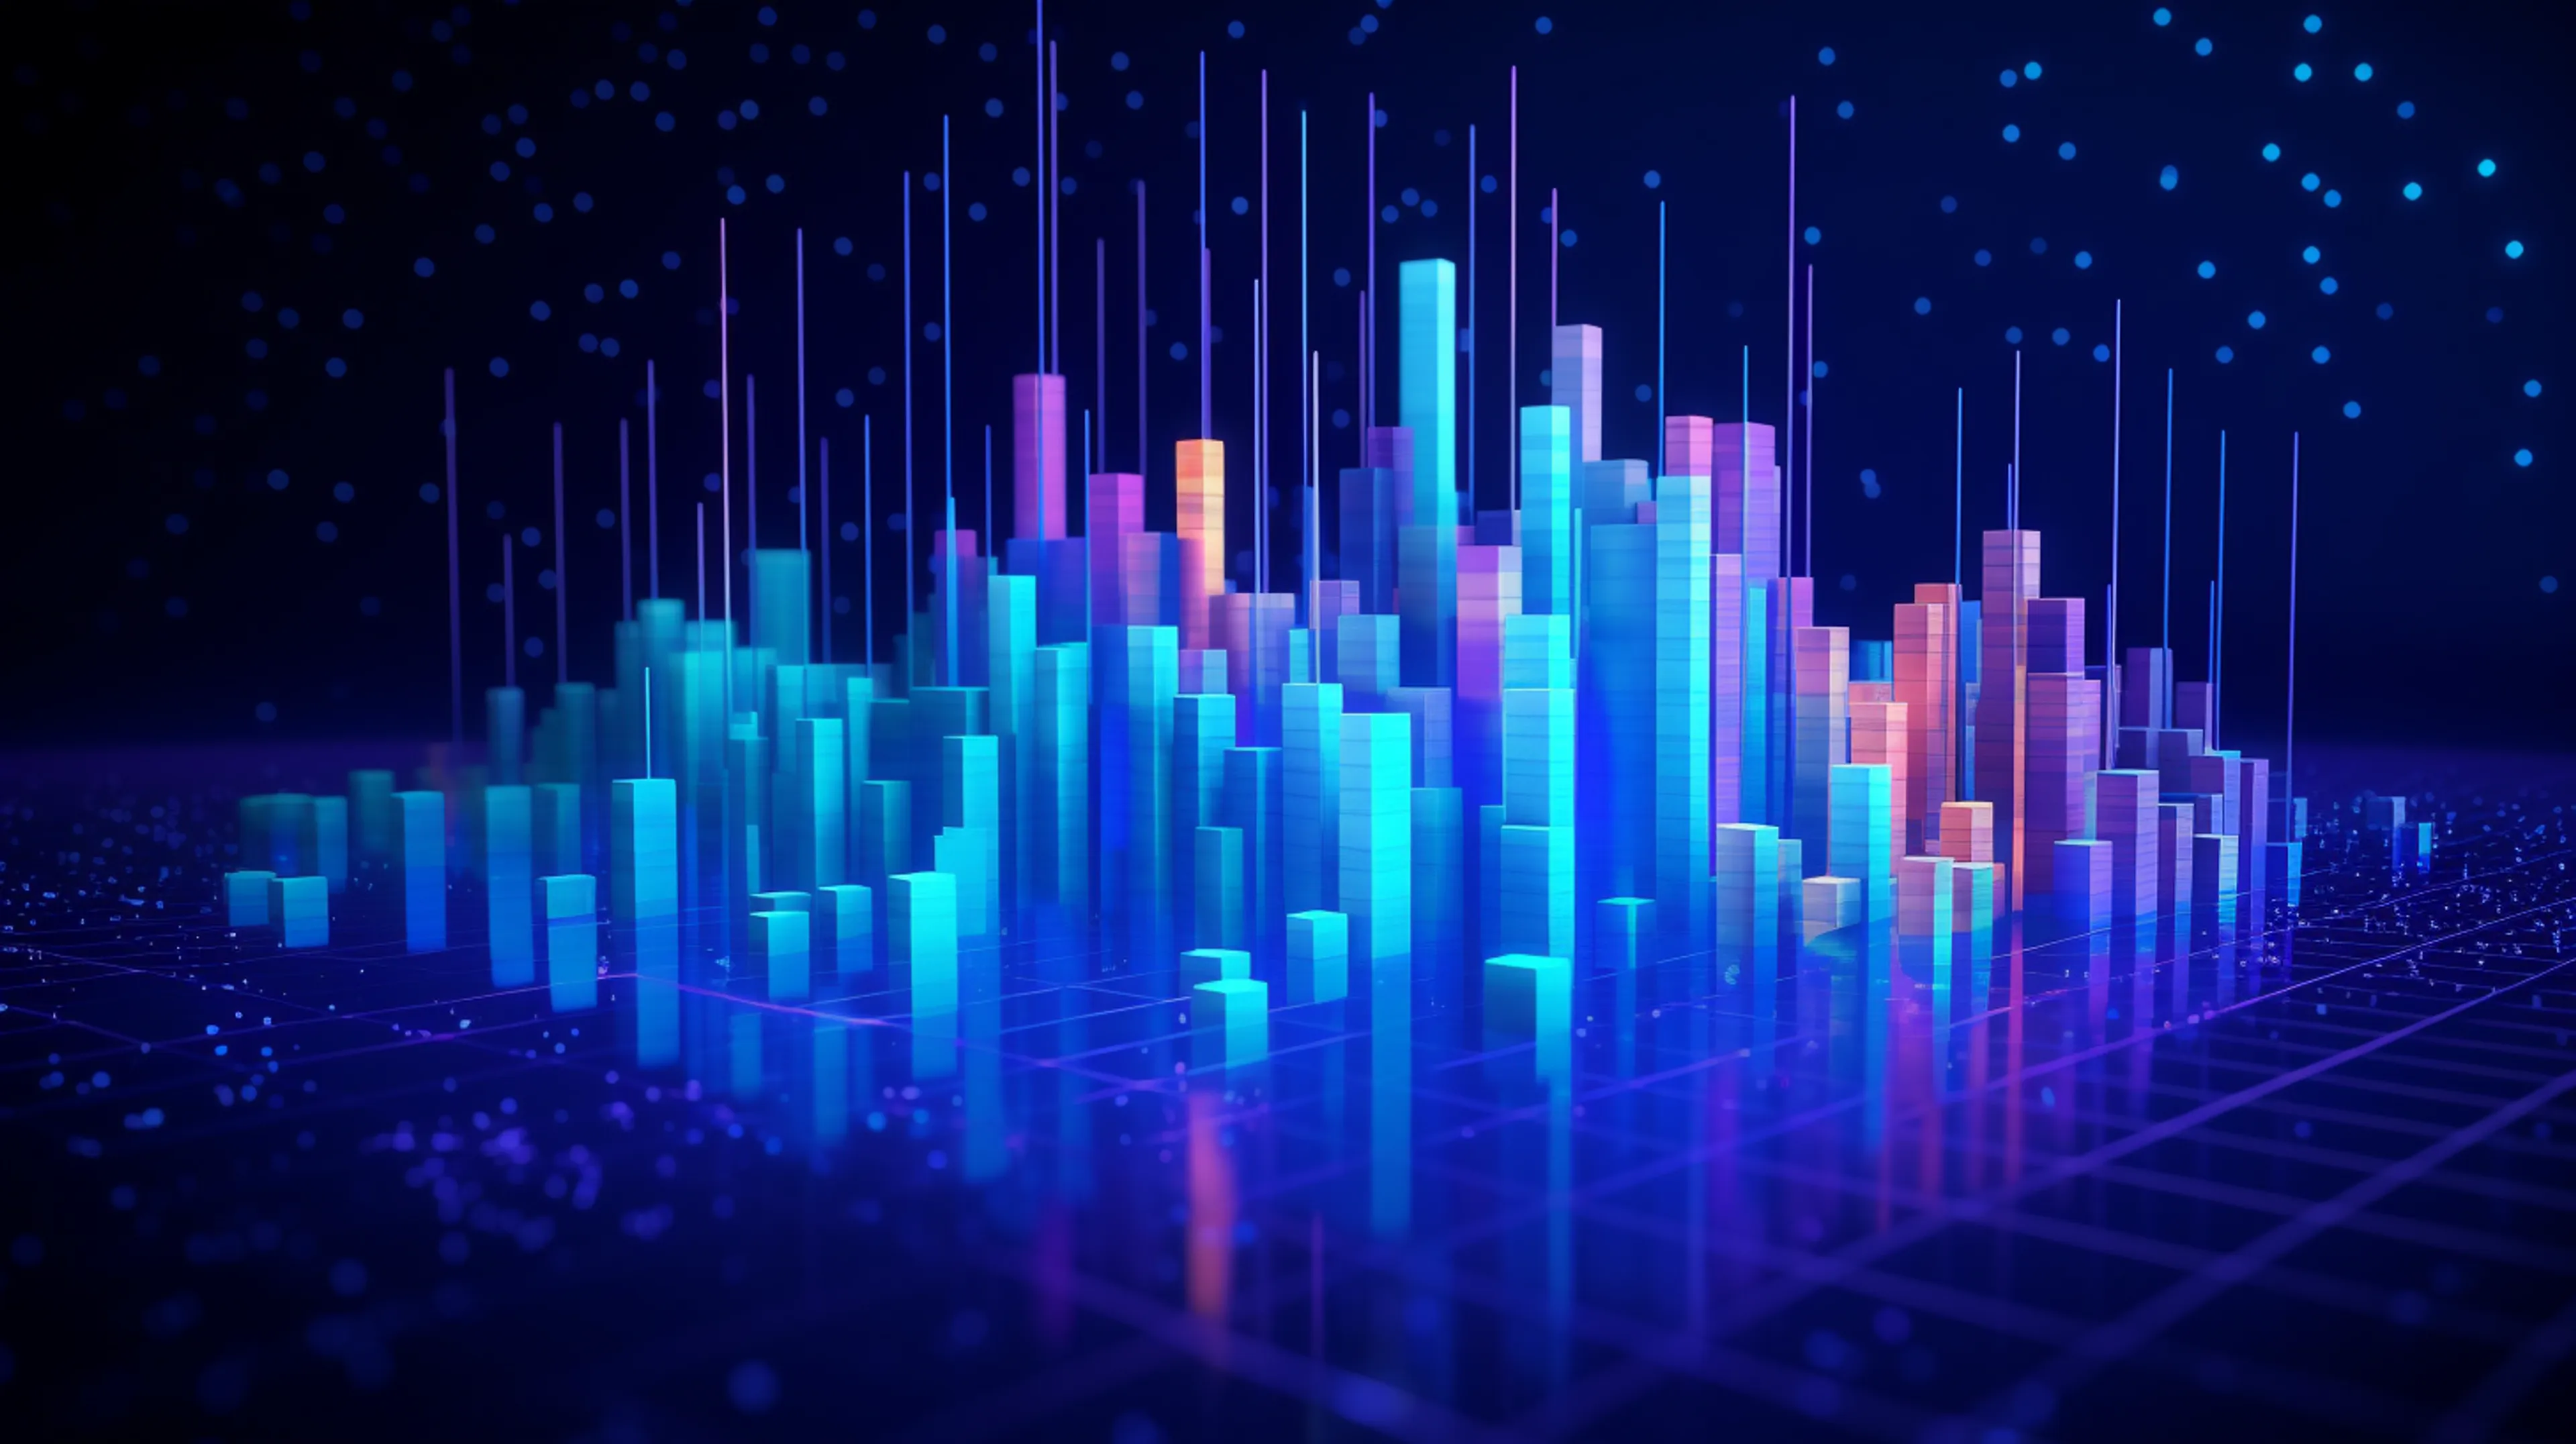

### Gerekli kütüphaneleri yükleme

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Veri setini yükleme

In [2]:
data = pd.read_csv("İşBaşvuruları.csv")

### Veri setini görüntüleme

In [3]:
data.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,Y,4,BS,N,N,Y
1,0,N,0,PhD,Y,Y,Y
2,5,Y,2,MS,N,Y,Y
3,3,N,1,BS,N,Y,Y
4,0,N,0,BS,N,N,N


### Eksik değerleri doldurma

In [4]:
numeric_imputer = SimpleImputer(strategy='constant')  
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns

data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

### Kategorik değişkenleri sayısala çevirme

In [5]:
duzetme_mapping = {'Y': 1, 'N': 0}
data['IseAlindi'] = data['IseAlindi'].map(duzetme_mapping)
data['SuanCalisiyor?'] = data['SuanCalisiyor?'].map(duzetme_mapping)
data['Top10 Universite?'] = data['Top10 Universite?'].map(duzetme_mapping)
data['StajBizdeYaptimi?'] = data['StajBizdeYaptimi?'].map(duzetme_mapping)

duzetme_mapping_egitim = {'BS': 0, 'MS': 1, 'PhD': 2}
data['Egitim Seviyesi'] = data['Egitim Seviyesi'].map(duzetme_mapping_egitim)

### Kategorik değişkenler sayısala çevrildikten sonra veri seti

In [6]:
print("\nKategorik değişkenler sayısala çevrildikten sonra veri seti:")
data.head()


Kategorik değişkenler sayısala çevrildikten sonra veri seti:


,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,1,4,0,0,0,1
1,0,0,0,2,1,1,1
2,5,1,2,1,0,1,1
3,3,0,1,0,0,1,1
4,0,0,0,0,0,0,0


### Bağımlı ve bağımsız değişkenleri belirleme

In [7]:
y = data['IseAlindi']
X = data.drop(['IseAlindi'], axis=1)

### Eğitim ve test veri setlerini oluşturma

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Support Vector Machines (SVM) Modeli

In [9]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

### Tahminler

In [10]:
y_pred_svm = svm_clf.predict(X_test)

### Model Performansı

In [11]:
print("SVM Model Performansı:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Model Performansı:
Accuracy: 0.5


### Gradient Boosting Modeli

In [12]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

### Tahminler

In [13]:
y_pred_gb = gb_clf.predict(X_test)

### Model Performansı

In [14]:
print("\nGradient Boosting Model Performansı:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Model Performansı:
Accuracy: 0.75


### Decision Tree Modeli

In [21]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Tahminler

In [22]:
y_pred_dt = dt_clf.predict(X_test)

### Model Performansı

In [23]:
print("\nDecision Tree Model Performansı:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Model Performansı:
Accuracy: 0.25


### Confusion matrix görselleştirme

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

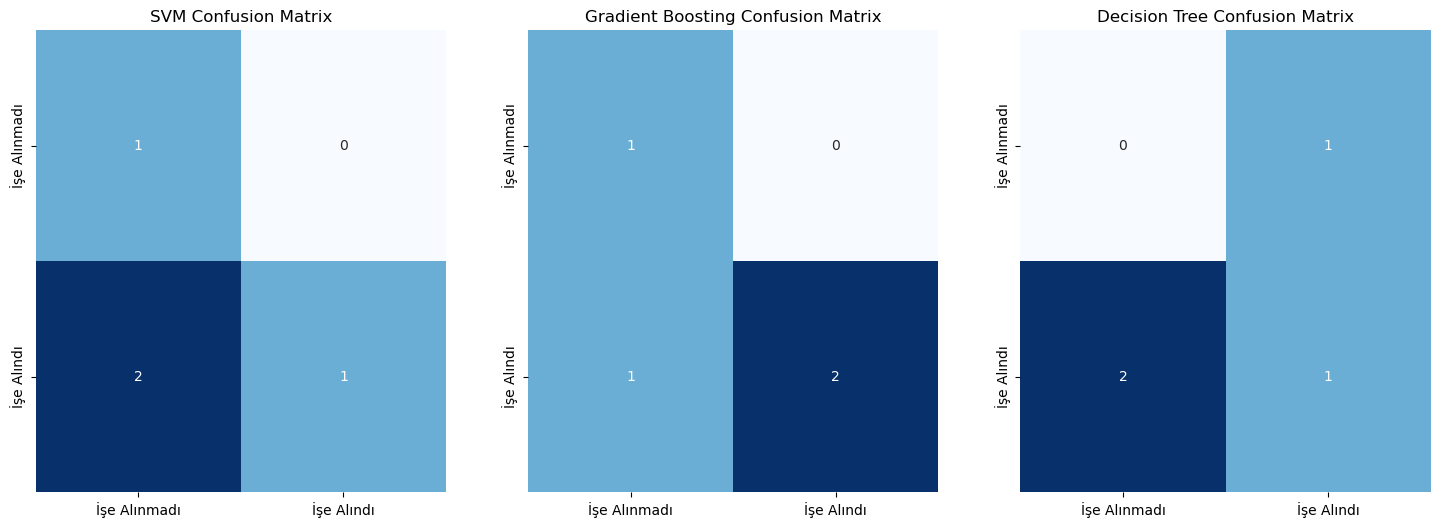

In [24]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_gb = confusion_matrix(y_test, y_pred_gb)
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["İşe Alınmadı", "İşe Alındı"],
            yticklabels=["İşe Alınmadı", "İşe Alındı"])
plt.title('SVM Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["İşe Alınmadı", "İşe Alındı"],
            yticklabels=["İşe Alınmadı", "İşe Alındı"])
plt.title('Gradient Boosting Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["İşe Alınmadı", "İşe Alındı"],
            yticklabels=["İşe Alınmadı", "İşe Alındı"])
plt.title('Decision Tree Confusion Matrix')

### Örnek tahminler

In [25]:
tahmin_1_svm = svm_clf.predict([[3, 1, 4, 1, 1, 0]])
tahmin_1_gb = gb_clf.predict([[3, 1, 4, 1, 1, 0]])
tahmin_1_dt = dt_clf.predict([[3, 1, 4, 1, 1, 0]])

tahmin_2_svm = svm_clf.predict([[15, 1, 5, 1, 0, 0]])
tahmin_2_gb = gb_clf.predict([[15, 1, 5, 1, 0, 0]])
tahmin_2_dt = dt_clf.predict([[15, 1, 5, 1, 0, 0]])

tahmin_3_svm = svm_clf.predict([[8, 0, 4, 1, 1, 1]])
tahmin_3_gb = gb_clf.predict([[8, 0, 4, 1, 1, 1]])
tahmin_3_dt = dt_clf.predict([[8, 0, 4, 1, 1, 1]])

D:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature nam

### Tahminleri yazdırma

In [26]:
print("\nÖrnek Tahminler:")

print("\nSVM - Tahmin 1:", f"[{tahmin_1_svm[0]}] İşe Alındı" if tahmin_1_svm == 1 else f"[{tahmin_1_svm[0]}] İşe Alınmadı")
print("Gradient Boosting - Tahmin 1:", f"[{tahmin_1_gb[0]}] İşe Alındı" if tahmin_1_gb == 1 else f"[{tahmin_1_gb[0]}] İşe Alınmadı")
print("Decision Tree - Tahmin 1:", f"[{tahmin_1_dt[0]}] İşe Alındı" if tahmin_1_dt == 1 else f"[{tahmin_1_dt[0]}] İşe Alınmadı")

print("\nSVM - Tahmin 2:", f"[{tahmin_2_svm[0]}] İşe Alındı" if tahmin_2_svm == 1 else f"[{tahmin_2_svm[0]}] İşe Alınmadı")
print("Gradient Boosting - Tahmin 2:", f"[{tahmin_2_gb[0]}] İşe Alındı" if tahmin_2_gb == 1 else f"[{tahmin_2_gb[0]}] İşe Alınmadı")
print("Decision Tree - Tahmin 2:", f"[{tahmin_2_dt[0]}] İşe Alındı" if tahmin_2_dt == 1 else f"[{tahmin_2_dt[0]}] İşe Alınmadı")

print("\nSVM - Tahmin 3:", f"[{tahmin_3_svm[0]}] İşe Alındı" if tahmin_3_svm == 1 else f"[{tahmin_3_svm[0]}] İşe Alınmadı")
print("Gradient Boosting - Tahmin 3:", f"[{tahmin_3_gb[0]}] İşe Alındı" if tahmin_3_gb == 1 else f"[{tahmin_3_gb[0]}] İşe Alınmadı")
print("Decision Tree - Tahmin 3:", f"[{tahmin_3_dt[0]}] İşe Alındı" if tahmin_3_dt == 1 else f"[{tahmin_3_dt[0]}] İşe Alınmadı")



Örnek Tahminler:

SVM - Tahmin 1: [1] İşe Alındı
Gradient Boosting - Tahmin 1: [1] İşe Alındı
Decision Tree - Tahmin 1: [1] İşe Alındı

SVM - Tahmin 2: [0] İşe Alınmadı
Gradient Boosting - Tahmin 2: [0] İşe Alınmadı
Decision Tree - Tahmin 2: [0] İşe Alınmadı

SVM - Tahmin 3: [0] İşe Alınmadı
Gradient Boosting - Tahmin 3: [1] İşe Alındı
Decision Tree - Tahmin 3: [1] İşe Alındı


### Tahminlere göre doğruluk oranları

In [27]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

### Model doğruluk oranlarını görselleştirme

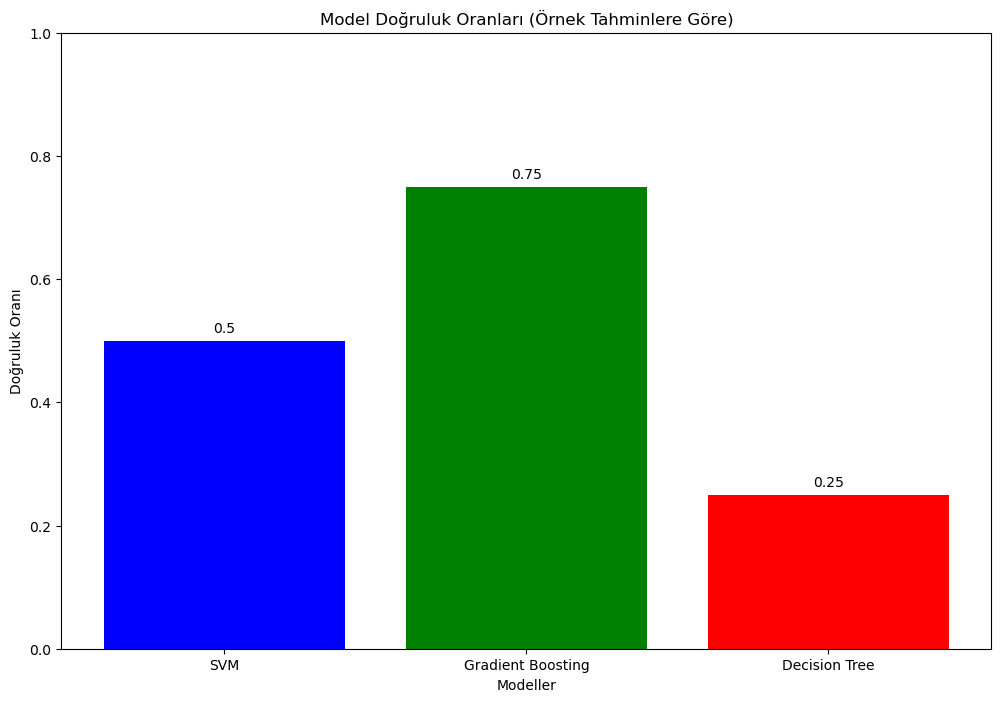

In [28]:
methods = ['SVM', 'Gradient Boosting', 'Decision Tree']
accuracy_scores = [accuracy_svm, accuracy_gb, accuracy_dt]

plt.figure(figsize=(12, 8))
plt.bar(methods, accuracy_scores, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Model Doğruluk Oranları (Örnek Tahminlere Göre)')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk Oranı')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), color='black', ha='center', va='center')

plt.show()